In [217]:
###Enviroment set-up###
import csv
import numpy as np
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)
#Matplotlib
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
from matplotlib.projections import register_projection

#Statsmodels
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg

#Pandas
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot

#Scikitlearn
from sklearn.metrics import mean_squared_error

#Math
from math import sqrt

# Introduction

You got this :)

# Clean Data

- Remove comma from volume that messes with the delimiter of the CSV file
- Transfer data from CSV file to pandas data frame

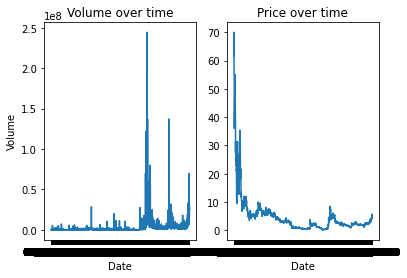

In [192]:
#Clean data, specifically the colon from volume that messes with the delimter
with open(r'Data Collection\plug.csv', "r") as infile, open("plug_output.csv", "w") as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    for row in reader:
        writer.writerow(item.replace(",", "") for item in row)
        

df = pd.read_csv(r'plug_output.csv')
df = df.drop('Open', 1).drop('High', 1).drop('Low', 1)
df.rename(columns={"Close": "Price"})


#Plot data
plt.subplot(1, 2, 1)
plt.plot(df['Date'], df['Volume'])
plt.title('Volume over time')
plt.xlabel('Date')
plt.ylabel('Volume')


plt.subplot(1, 2, 2)
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.title('Price over time')

plt.show()



# Persistance Model
In this experiment, the univarate analysis will be used as a baseline for how much information volume holds by only basing the analysis of the of the price on day $t$ on some series of previous day prices.



First, determine which lag variables will be most suited to use in the model we are developing. 
Then estimate the parameters for the autoregressive model.

Lag plots and pearson correlations are good indicators of if individual lags are worth looking at for our autoregressive model. 



Pearson correlations are shown by the formula $$\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y}$$
and is represented with a number between -1 and 1. Numbers closer to 0 represent no correlation between the data, and numbers away from 0 (near -1 or 1) indicate high correlation. Correlations near -1 show strong inverse correlation (as X goes up/down, Y goes down/up), and correlations near 1 show strong lienar correlations (as X goes up/down, Y goes up/down). Confidence bands for these correlations will be computed later.




On a larger scale, autocorrelation plots show en mass of the correlations between different lags with the data. Areas with autocorrelations above/below the 95/99% confidence bands show lags that have high potential to be used in training the model as the past and present data have a strong correlation.


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

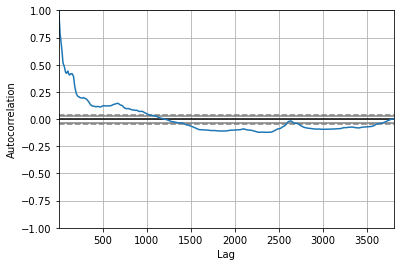

In [198]:
"""
LAG_DAY = 28

# Checks for single lag day correlations b/t t-100 and t+100 days

# Check for correlation using pandas lag plot
# Shows relationshop between prices at t and t-lag days
lag_plot(df['Close'], lag = LAG_DAY)

# Use pearson correlation to test correlation b/t t and t-lag days
newwframe = concat([df['Close'].shift(LAG_DAY), df['Close']], axis=1)
newframe.columns = ['t-' + str(LAG_DAY), 't+' + str(LAG_DAY)]
print(newframe.corr(method = "pearson"))
"""



### Autocorreleation plot ###
autocorrelation_plot(df['Close'])


### ACF plot ###
#plot_acf(df['Close'])

Next, we will procude a persistance model to give a baseline for the preformance of the results that the later univariate autoregressive model produces. The most basic persistance model would persist the price at day t-1 to the price of day t but a more optimized verson, which will be implemented, will find the best suited lag to use and persist the price at time t-lag to the price at time t. With this implementation, a 80/20 test/train split will be used.

Walkfoward validation will also be used in order to reduce overfitting and optimize our model as much as possible.



In [214]:
# split into train and test sets
X = df['Close'].values
train_size = int(len(X) * 0.80)
train, test = X[1:train_size], X[train_size:]
 
# persistence model
def model_persistence(x):
	return x
 
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % test_score)

Test RMSE: 0.116


We will now use an autoregressive model to predict price solely based off of previous price. This model will serve as a benchmark for the later implemented multivariate autoregressive model that takes into account volume. 

# Univariate Autoregressive Model

In [227]:
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

#create train/test datasets
X = df['Close']
train_data, test_data = X[0:int(len(X)*.8)], X[int(len(X)*.8):] #pandas.core.series.Series

#train the autoregression model
model = AutoReg(train_data, lags = [1, 2, 18]).fit()

predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)

print('RMSE:', sqrt(mean_squared_error(test_data, predictions)))

RMSE: 1.3236278102057488


C:\Users\CS 2110\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


# TODO
1. Univariate Autoregressive Model
2. Find some way to incorperate google trends information and change in volume
3. Multivariate Autoregressive Model
4. Write introdution